***Import library***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dataset Kebotakan-(Not Clean).csv to Dataset Kebotakan-(Not Clean).csv


In [3]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Dataset Kebotakan-(Not Clean).csv']))

***EDA (Exploratory Data Analysis)***

In [4]:
df.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7832 non-null   float64
 1   jenis_kelamin  7840 non-null   object 
 2   pekerjaan      7760 non-null   object 
 3   provinsi       7831 non-null   object 
 4   gaji           7843 non-null   float64
 5   is_menikah     7845 non-null   float64
 6   is_keturunan   7828 non-null   float64
 7   berat          7861 non-null   float64
 8   tinggi         7843 non-null   float64
 9   sampo          7858 non-null   object 
 10  is_merokok     7847 non-null   float64
 11  pendidikan     7847 non-null   object 
 12  stress         7853 non-null   float64
 13  botak_prob     7838 non-null   float64
dtypes: float64(9), object(5)
memory usage: 866.0+ KB


In [6]:
df.describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,stress,botak_prob
count,7832.000000,7.843000e+03,7845.000000,7828.000000,7861.000000,7843.000000,7847.000000,7853.000000,7838.000000
mean,39.492722,8.853770e+06,0.979095,0.204650,55.957306,167.252704,0.497133,5.456259,0.573851
std,9.882786,4.499844e+06,0.143076,0.403471,9.594065,10.933646,0.500024,2.860623,0.173386
min,2.000000,1.500000e+06,0.000000,0.000000,40.000000,125.491784,0.000000,1.000000,0.064633
25%,33.000000,5.735468e+06,1.000000,0.000000,49.312715,159.758874,0.000000,3.000000,0.452360
50%,39.000000,7.850662e+06,1.000000,0.000000,53.839669,167.155287,0.000000,5.000000,0.567954
75%,46.000000,1.083589e+07,1.000000,0.000000,60.259654,174.439620,1.000000,8.000000,0.686782
max,77.000000,5.000000e+07,1.000000,1.000000,150.000000,226.454577,1.000000,10.000000,1.000000


***Preprocessing data***

In [7]:
df.head(5)

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371


In [8]:
df.isnull().sum()

,0
umur,85
jenis_kelamin,77
pekerjaan,157
provinsi,86
gaji,74
is_menikah,72
is_keturunan,89
berat,56
tinggi,74
sampo,59


In [9]:
umur_20 = df['umur'] <= 20
df['is_menikah'] = df['is_menikah'].fillna(umur_20.map({True:0, False: 1}))

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imputer = SimpleImputer(strategy='mean')
# numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = ['umur', 'gaji', 'is_keturunan', 'berat', 'tinggi', 'is_merokok', 'stress']
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [12]:
df.isnull().sum()

,0
umur,0
jenis_kelamin,77
pekerjaan,157
provinsi,86
gaji,0
is_menikah,0
is_keturunan,0
berat,0
tinggi,0
sampo,59


In [13]:
df['jenis_kelamin'].fillna(df['jenis_kelamin'].mode()[0], inplace=True)
df['provinsi'].fillna(df['provinsi'].mode()[0], inplace=True)
df['sampo'].fillna(df['sampo'].mode()[0], inplace=True)
df['pendidikan'].fillna(df['pendidikan'].mode()[0], inplace=True)
df['pekerjaan'].fillna(df['pekerjaan'].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

,0
umur,0
jenis_kelamin,0
pekerjaan,0
provinsi,0
gaji,0
is_menikah,0
is_keturunan,0
berat,0
tinggi,0
sampo,0


In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

,0
umur,0
jenis_kelamin,0
pekerjaan,0
provinsi,0
gaji,0
is_menikah,0
is_keturunan,0
berat,0
tinggi,0
sampo,0


In [17]:
df.duplicated(subset=['umur','sampo', 'berat', 'jenis_kelamin', 'pekerjaan', 'provinsi', 'pendidikan', 'stress', 'gaji']).sum()

81

In [18]:
df.drop_duplicates(inplace=True)

<ipython-input-18-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(7757, 14)

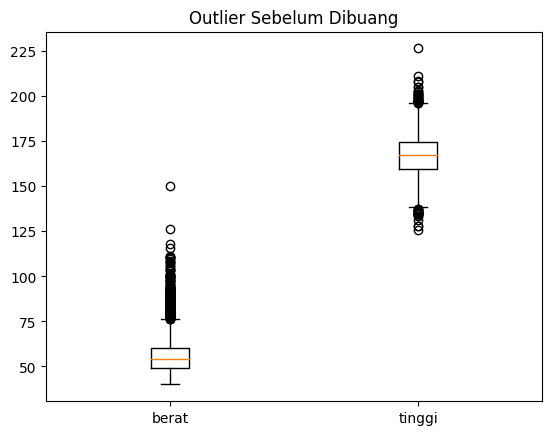

Jumlah Baris dengan outlier : 7757


In [21]:
kolom_numerik = ['berat', 'tinggi']
plt.boxplot(df[kolom_numerik])
plt.xticks([1, 2], kolom_numerik)
plt.title('Outlier Sebelum Dibuang')
plt.show()
print(f'Jumlah Baris dengan outlier : {df.shape[0]}')

In [22]:
Q1 = df[kolom_numerik].quantile(0.25)
Q3 = df[kolom_numerik].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[kolom_numerik] < (Q1 - 1.5 * IQR)) | (df[kolom_numerik] > (Q3 + 1.5 * IQR))).any(axis=1)]

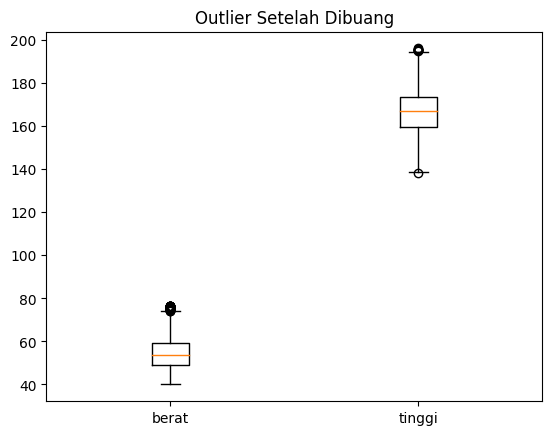

Jumlah Baris Tanpa Outlier : 7432


In [23]:
plt.boxplot(df[kolom_numerik])
plt.xticks([1, 2], kolom_numerik)
plt.title('Outlier Setelah Dibuang')
plt.show()
print(f'Jumlah Baris Tanpa Outlier : {df.shape[0]}')

<Axes: >

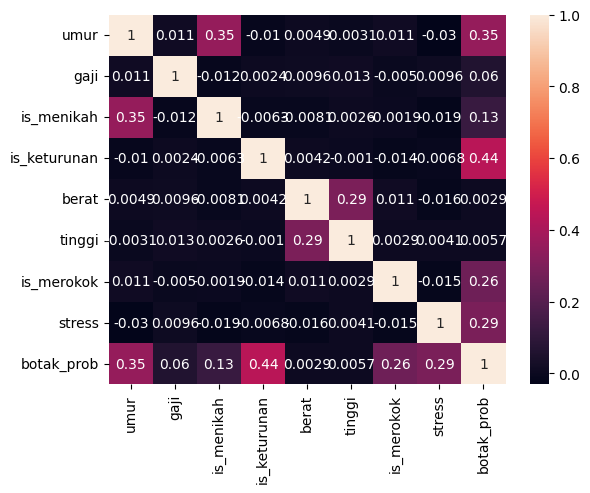

In [26]:
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True)

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df['berat'] = MinMaxScaler().fit_transform(df['berat'].values.reshape(len(df), 1))
df['tinggi'] = MinMaxScaler().fit_transform(df['tinggi'].values.reshape(len(df), 1))
df['umur'] = StandardScaler().fit_transform(df['umur'].values.reshape(len(df), 1))
df['gaji'] = StandardScaler().fit_transform(df['gaji'].values.reshape(len(df), 1))

In [28]:
df

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,-1.273475,Perempuan,PNS,Bengkulu,-0.197146,1.0,0.0,0.392246,0.555188,Pantone,1.0,S1,5.0,0.605974
1,1.376825,Perempuan,PNS,Bandung,-0.270151,1.0,0.0,0.900763,0.470294,Pantone,0.0,S1,7.0,0.532860
2,-0.254129,Perempuan,Pegawai swasta,Bandung,-0.494121,1.0,0.0,0.173216,0.280856,Moonsilk,0.0,S1,4.0,0.418442
3,-0.356064,Perempuan,Pengangguran,Palu,-1.172023,1.0,0.0,0.316201,0.501669,Deadbuoy,1.0,SD,9.0,0.804050
4,-0.152194,Laki-laki,Freelance,Palangkaraya,-0.630437,1.0,0.0,0.567937,0.470028,Merpati,1.0,S2,1.0,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1.274891,Laki-laki,PNS,Manokwari,-1.023190,1.0,0.0,0.188887,0.545684,Deadbuoy,1.0,SMA,2.0,0.773141
7831,0.561348,Laki-laki,PNS,Tanjungselor,-0.042183,1.0,0.0,0.380290,0.549890,Pantone,0.0,S1,2.0,0.604058
7832,-1.579279,Laki-laki,PNS,Jambi,-0.446320,1.0,0.0,0.662317,0.398452,Moonsilk,0.0,SMA,8.0,0.502413
7833,-1.069606,Laki-laki,Pegawai swasta,Palangkaraya,0.723631,1.0,0.0,0.416981,0.714173,Pantone,1.0,SMA,6.0,0.562664


In [29]:
df = df.drop('provinsi', axis=1)

In [30]:
df

,umur,jenis_kelamin,pekerjaan,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,-1.273475,Perempuan,PNS,-0.197146,1.0,0.0,0.392246,0.555188,Pantone,1.0,S1,5.0,0.605974
1,1.376825,Perempuan,PNS,-0.270151,1.0,0.0,0.900763,0.470294,Pantone,0.0,S1,7.0,0.532860
2,-0.254129,Perempuan,Pegawai swasta,-0.494121,1.0,0.0,0.173216,0.280856,Moonsilk,0.0,S1,4.0,0.418442
3,-0.356064,Perempuan,Pengangguran,-1.172023,1.0,0.0,0.316201,0.501669,Deadbuoy,1.0,SD,9.0,0.804050
4,-0.152194,Laki-laki,Freelance,-0.630437,1.0,0.0,0.567937,0.470028,Merpati,1.0,S2,1.0,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1.274891,Laki-laki,PNS,-1.023190,1.0,0.0,0.188887,0.545684,Deadbuoy,1.0,SMA,2.0,0.773141
7831,0.561348,Laki-laki,PNS,-0.042183,1.0,0.0,0.380290,0.549890,Pantone,0.0,S1,2.0,0.604058
7832,-1.579279,Laki-laki,PNS,-0.446320,1.0,0.0,0.662317,0.398452,Moonsilk,0.0,SMA,8.0,0.502413
7833,-1.069606,Laki-laki,Pegawai swasta,0.723631,1.0,0.0,0.416981,0.714173,Pantone,1.0,SMA,6.0,0.562664


In [31]:
df['pekerjaan'].value_counts()

,count
pekerjaan,
Pegawai swasta,3106
PNS,2931
Freelance,1082
Pengangguran,313


In [32]:
df['sampo'].value_counts()

,count
sampo,
Deadbuoy,1572
Moonsilk,1494
Pantone,1479
Shoulder & Head,1467
Merpati,1420


In [33]:
df['pendidikan'].value_counts()

,count
pendidikan,
S1,4097
SMA,1859
S2,578
SMP,531
SD,218
S3,149


In [34]:
kolom_kategorik = ['jenis_kelamin', 'pekerjaan', 'sampo', 'pendidikan']

jk_map = ({
    'Laki-laki' : 1,
    'Perempuan' : 0
})
pekerjaan_map = ({
    'Freelance' : 0,
    'Pegawai swasta' : 1,
    'PNS' : 2,
    'Pengangguran' : 3
})
sampo_map = ({
    'Deadbuoy' : 0,
    'Moonsilk' : 1,
    'Pantone' : 2,
    'Shoulder & Head' : 3,
    'Merpati' : 4
})
pendidikan_map = ({
    'SD' : 0,
    'SMP' : 1,
    'SMA' : 2,
    'S1' : 3,
    'S2' : 4,
    'S3' : 5,
})

my_map = [jk_map, pekerjaan_map, sampo_map, pendidikan_map]

for kolom, my_map in zip(kolom_kategorik, my_map):
  df[kolom] = df[kolom].map(my_map)

In [35]:
df

,umur,jenis_kelamin,pekerjaan,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,-1.273475,0,2,-0.197146,1.0,0.0,0.392246,0.555188,2,1.0,3,5.0,0.605974
1,1.376825,0,2,-0.270151,1.0,0.0,0.900763,0.470294,2,0.0,3,7.0,0.532860
2,-0.254129,0,1,-0.494121,1.0,0.0,0.173216,0.280856,1,0.0,3,4.0,0.418442
3,-0.356064,0,3,-1.172023,1.0,0.0,0.316201,0.501669,0,1.0,0,9.0,0.804050
4,-0.152194,1,0,-0.630437,1.0,0.0,0.567937,0.470028,4,1.0,4,1.0,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1.274891,1,2,-1.023190,1.0,0.0,0.188887,0.545684,0,1.0,2,2.0,0.773141
7831,0.561348,1,2,-0.042183,1.0,0.0,0.380290,0.549890,2,0.0,3,2.0,0.604058
7832,-1.579279,1,2,-0.446320,1.0,0.0,0.662317,0.398452,1,0.0,2,8.0,0.502413
7833,-1.069606,1,1,0.723631,1.0,0.0,0.416981,0.714173,2,1.0,2,6.0,0.562664


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [38]:
df.head()

,umur,jenis_kelamin,pekerjaan,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,-1.273475,0,2,-0.197146,1.0,0.0,0.392246,0.555188,2,1.0,3,5.0,0.605974
1,1.376825,0,2,-0.270151,1.0,0.0,0.900763,0.470294,2,0.0,3,7.0,0.532860
2,-0.254129,0,1,-0.494121,1.0,0.0,0.173216,0.280856,1,0.0,3,4.0,0.418442
3,-0.356064,0,3,-1.172023,1.0,0.0,0.316201,0.501669,0,1.0,0,9.0,0.804050
4,-0.152194,1,0,-0.630437,1.0,0.0,0.567937,0.470028,4,1.0,4,1.0,0.368371


In [39]:
df.to_csv('Case Study Chapter 3 Topic 3_ Dataset Kebotakan (Not Clean).csv', index=False)

***Bagi data menjadi data train dan data test***

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop('botak_prob', axis=1)
y = df['botak_prob']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
test_predictions = model.predict(X_test)
test_predictions

array([0.73038179, 0.54575062, 0.68763937, ..., 0.46552565, 0.51689167,
       0.53510994])

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)

In [46]:
print(MAE, MSE)

0.05459942632896999 0.005698555816602013


In [47]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [48]:
poly_features

array([[-1.27347518,  0.        ,  2.        , ...,  9.        ,
        15.        , 25.        ],
       [ 1.37682518,  0.        ,  2.        , ...,  9.        ,
        21.        , 49.        ],
       [-0.25412889,  0.        ,  1.        , ...,  9.        ,
        12.        , 16.        ],
       ...,
       [-1.57927907,  1.        ,  2.        , ...,  4.        ,
        16.        , 64.        ],
       [-1.06960592,  1.        ,  1.        , ...,  4.        ,
        12.        , 36.        ],
       [ 0.25554426,  0.        ,  1.        , ..., 16.        ,
         8.        ,  4.        ]])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [50]:
model_poly = LinearRegression(fit_intercept=True)
model_poly.fit(X_train,y_train)

LinearRegression()

In [51]:
test_predictions = model_poly.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
print(MAE, MSE)

0.05335859470685206 0.0054218818357056955


***Visualisasi Data***

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from google.colab import files
uploaded = files.upload()

Saving Dataset Kebotakan-(Not Clean).csv to Dataset Kebotakan-(Not Clean) (1).csv


In [55]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Dataset Kebotakan-(Not Clean) (1).csv']))


In [56]:
df.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371


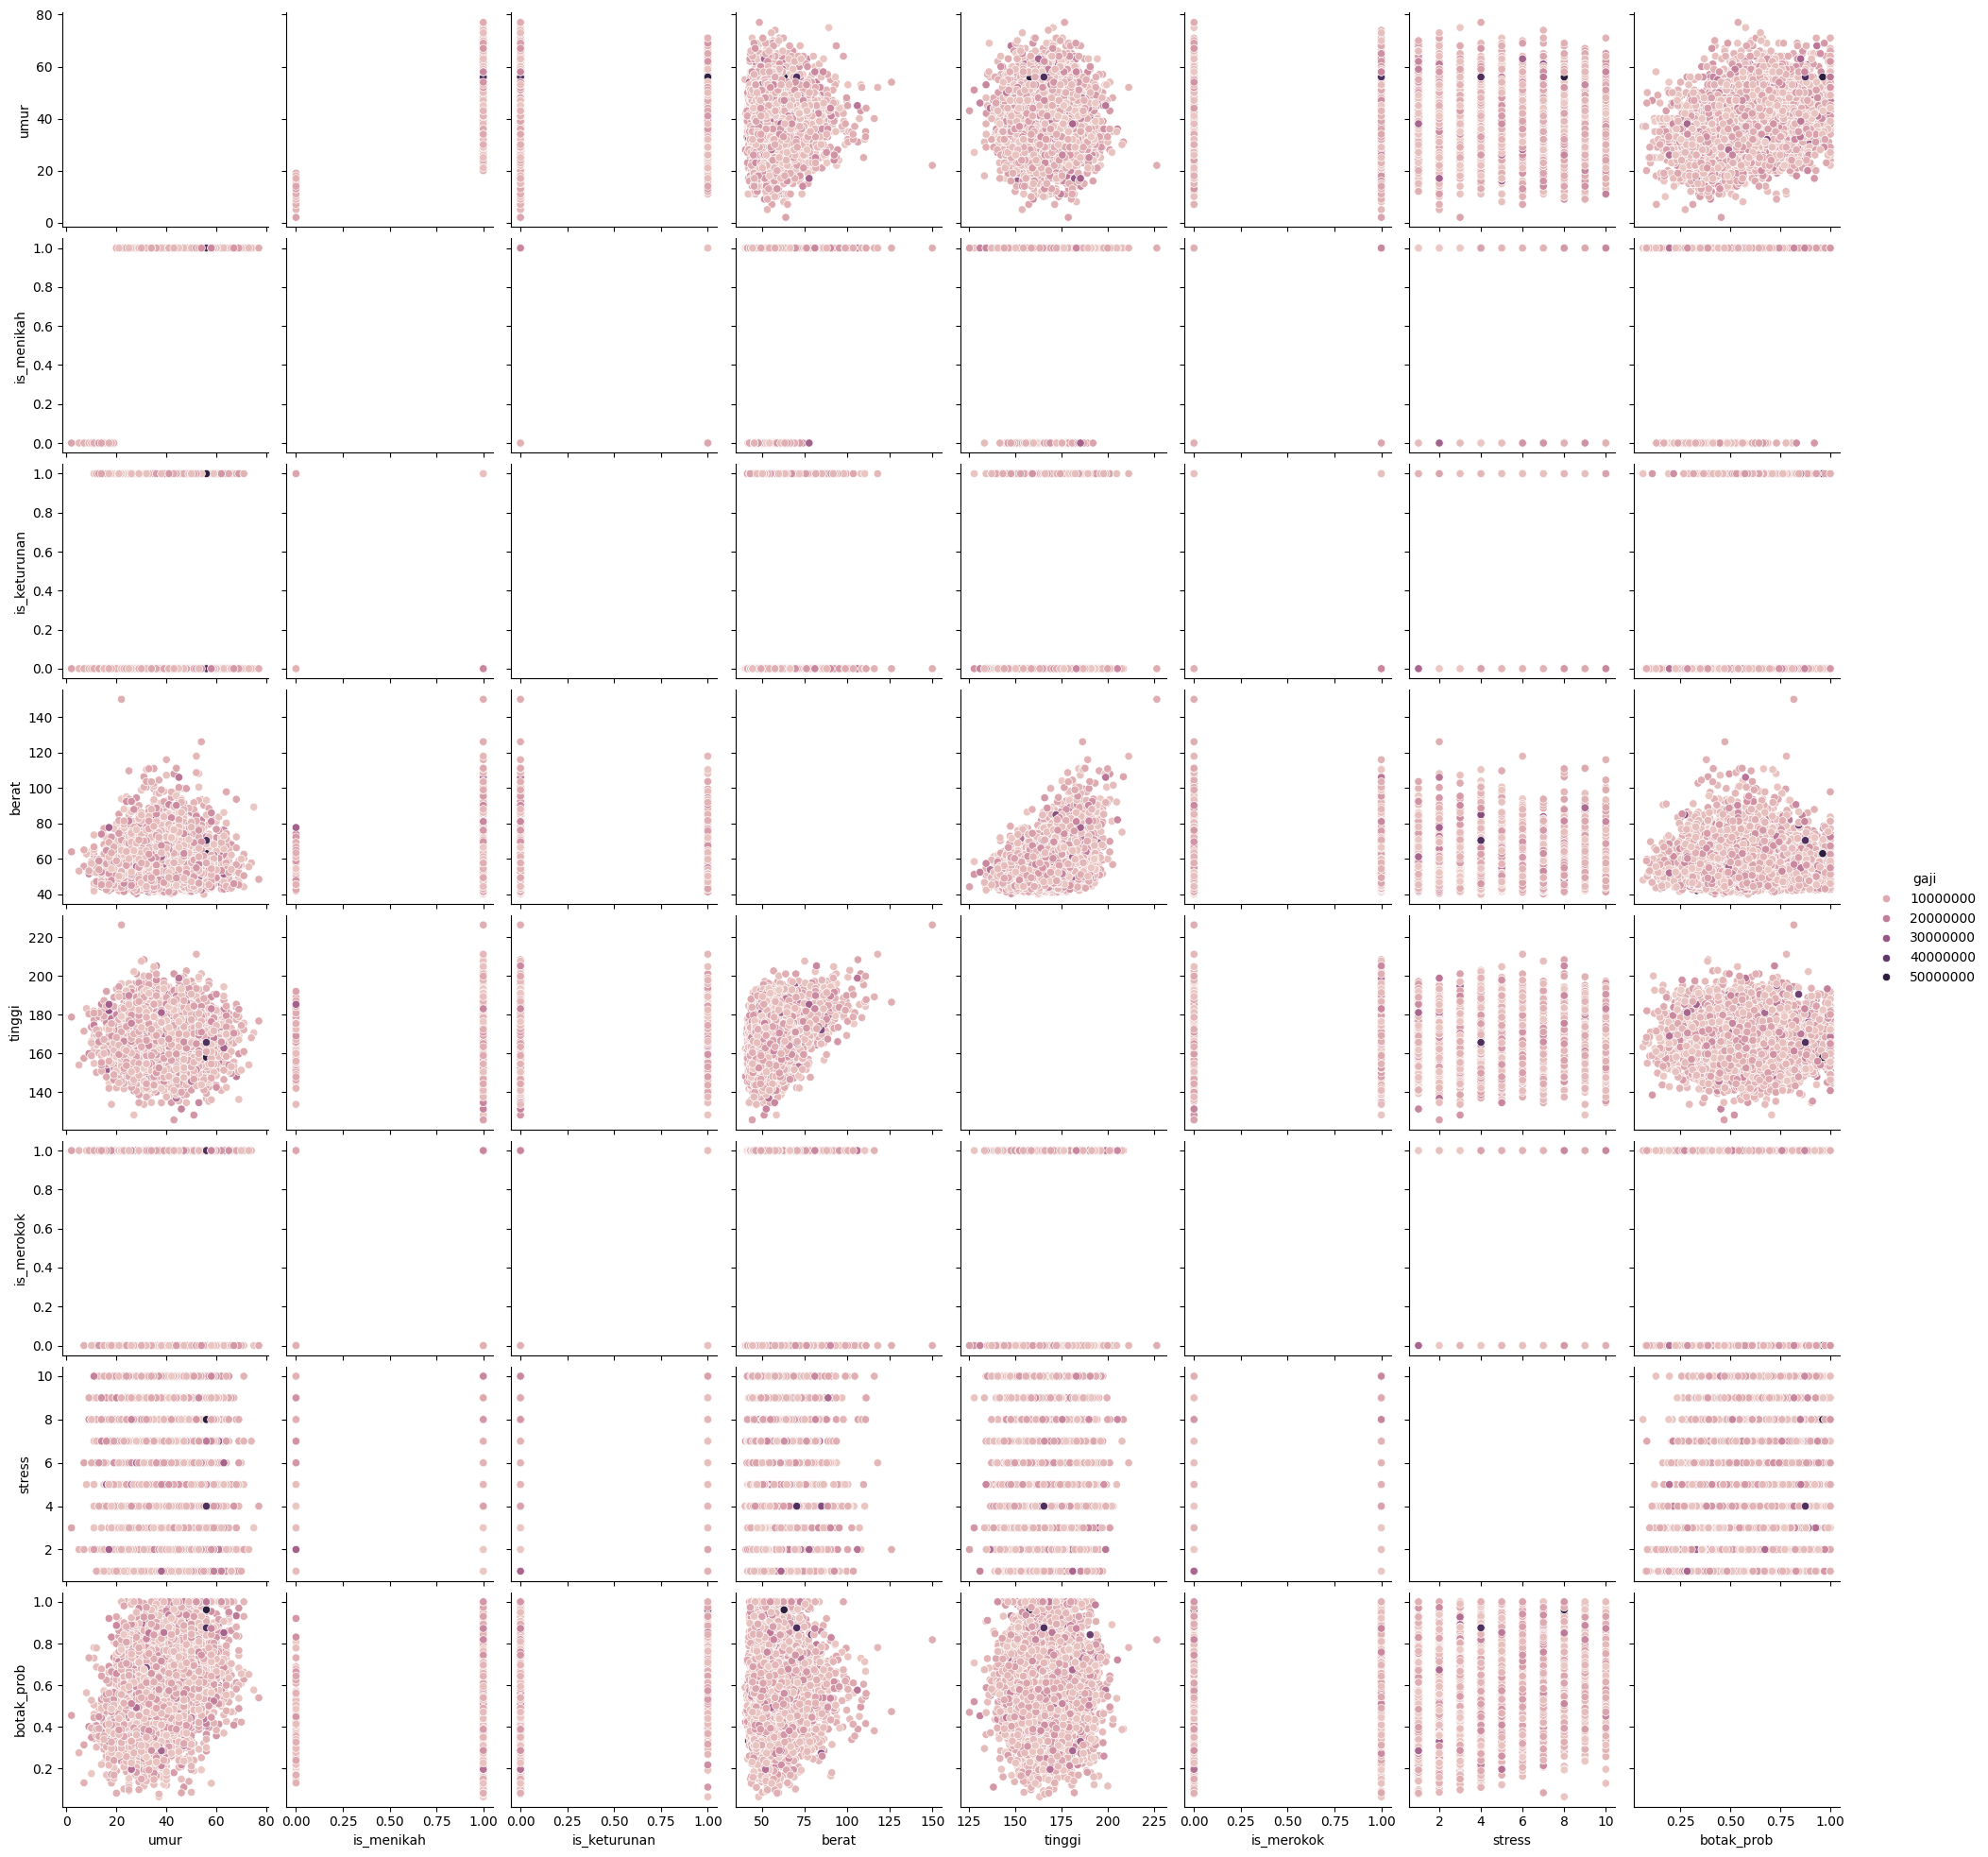

In [58]:
sns.pairplot(df,hue='gaji')

<Axes: >

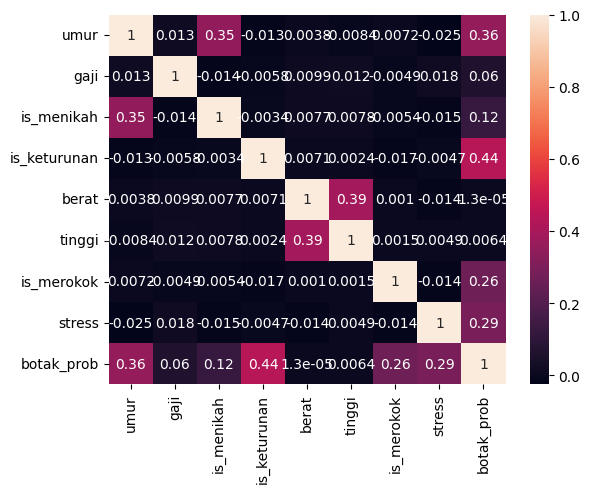

In [60]:
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True)

***Import Data***

In [61]:
import pandas as pd

In [62]:
url = 'Case Study Chapter 3 Topic 3_ Dataset Kebotakan (Not Clean).csv' # Ganti dengan URL dataset Anda
df = pd.read_csv(url)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7432 entries, 0 to 7431
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7432 non-null   float64
 1   jenis_kelamin  7432 non-null   int64  
 2   pekerjaan      7432 non-null   int64  
 3   gaji           7432 non-null   float64
 4   is_menikah     7432 non-null   float64
 5   is_keturunan   7432 non-null   float64
 6   berat          7432 non-null   float64
 7   tinggi         7432 non-null   float64
 8   sampo          7432 non-null   int64  
 9   is_merokok     7432 non-null   float64
 10  pendidikan     7432 non-null   int64  
 11  stress         7432 non-null   float64
 12  botak_prob     7432 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 754.9 KB


In [64]:
X = df.drop('sampo', axis=1)
y = df['sampo']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Buat model pada data train***

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression()

In [68]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

***Lakukan test dan evaluasi pada dataset***

In [69]:
y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score # Import the accuracy_score function

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) # Now you can use accuracy_score
print("\nAkurasi Model:", accuracy)


Akurasi Model: 0.20981842636180228


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
from sklearn.metrics import accuracy_score, classification_report # Import both accuracy_score and classification_report

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.20      0.55      0.30       298
           1       0.24      0.23      0.23       309
           2       0.19      0.08      0.11       307
           3       0.20      0.08      0.12       304
           4       0.22      0.10      0.14       269

    accuracy                           0.21      1487
   macro avg       0.21      0.21      0.18      1487
weighted avg       0.21      0.21      0.18      1487



In [77]:
if hasattr(model, 'coef_'):
     y_pred = model.predict(X_test)
     accuracy = accuracy_score(y_test, y_pred)
     print("Akurasi Model:", accuracy)
     print("\nLaporan Klasifikasi:")
     print(classification_report(y_test, y_pred))

print("Model belum dilatih dengan baik atau ada masalah dalam pelatihan.")

Akurasi Model: 0.20981842636180228

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.20      0.55      0.30       298
           1       0.24      0.23      0.23       309
           2       0.19      0.08      0.11       307
           3       0.20      0.08      0.12       304
           4       0.22      0.10      0.14       269

    accuracy                           0.21      1487
   macro avg       0.21      0.21      0.18      1487
weighted avg       0.21      0.21      0.18      1487

Model belum dilatih dengan baik atau ada masalah dalam pelatihan.
